In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd

# importing the dataset

data= pd.read_excel('/content/drive/MyDrive/final_dataset_dp.xlsx')
#print(data)
# into csv file
data.to_csv ("final_dataset_dp1.csv", 
                  index = None,
                  header=True)
   
                  
    
# read csv file and convert 
# into a dataframe object
data1 = pd.DataFrame(pd.read_csv("/content/final_dataset_dp1.csv"))
print(data1)


     S.no  pH m    pH CR  Cm (µS/cm)  Conductivity CR  LDR m (kΩ)   LDR CR  \
0       1  6.98  No Risk       736.0              0.0         304  No Risk   
1       2  7.39  No Risk       715.0              0.0         301  No Risk   
2       3  6.92  No Risk       665.0              0.0         302  No Risk   
3       4  6.95  No Risk       643.0              0.0         306  No Risk   
4       5  7.42  No Risk       714.0              0.0         305  No Risk   
..    ...   ...      ...         ...              ...         ...      ...   
255   256  5.53   0.0647         NaN              NaN         188    0.224   
256   257  5.53   0.0647         NaN              NaN         189    0.222   
257   258  5.51    0.066         NaN              NaN         190     0.22   
258   259  5.53   0.0647         NaN              NaN         192    0.216   
259   260  5.51    0.066         NaN              NaN         195     0.21   

                                          Class  
0            

In [7]:
# dropping the NaN values...
data1 =data1.dropna()
print(data1)

     S.no  pH m   pH CR  Cm (µS/cm)  Conductivity CR  LDR m (kΩ) LDR CR  \
0       1  6.98       0       736.0           0.0000         304      0   
1       2  7.39       0       715.0           0.0000         301      0   
2       3  6.92       0       665.0           0.0000         302      0   
3       4  6.95       0       643.0           0.0000         306      0   
4       5  7.42       0       714.0           0.0000         305      0   
..    ...   ...     ...         ...              ...         ...    ...   
151   152  3.59   0.194      1381.0           0.1905         309      0   
152   153  3.61  0.1927      1373.0           0.1865         309      0   
153   154  3.58  0.1947      1383.0           0.1915         309      0   
154   155  3.56   0.196      1365.0           0.1825         308      0   
155   156  3.59   0.194      1354.0           0.1770         309      0   

             Class  
0             pure  
1             pure  
2             pure  
3             p

In [6]:
# Replacing No Risk values with 0%
data1 = data1.replace('No Risk',0)
#print(data1)
#data1.replace('No Risk',0)
print(data1)

     S.no  pH m   pH CR  Cm (µS/cm)  Conductivity CR  LDR m (kΩ) LDR CR  \
0       1  6.98       0       736.0           0.0000         304      0   
1       2  7.39       0       715.0           0.0000         301      0   
2       3  6.92       0       665.0           0.0000         302      0   
3       4  6.95       0       643.0           0.0000         306      0   
4       5  7.42       0       714.0           0.0000         305      0   
..    ...   ...     ...         ...              ...         ...    ...   
151   152  3.59   0.194      1381.0           0.1905         309      0   
152   153  3.61  0.1927      1373.0           0.1865         309      0   
153   154  3.58  0.1947      1383.0           0.1915         309      0   
154   155  3.56   0.196      1365.0           0.1825         308      0   
155   156  3.59   0.194      1354.0           0.1770         309      0   

             Class  
0             pure  
1             pure  
2             pure  
3             p

In [8]:
data1.drop(data1.iloc[:, 6:7], inplace=True, axis=1)
print(data1)

     S.no  pH m   pH CR  Cm (µS/cm)  Conductivity CR  LDR m (kΩ)  \
0       1  6.98       0       736.0           0.0000         304   
1       2  7.39       0       715.0           0.0000         301   
2       3  6.92       0       665.0           0.0000         302   
3       4  6.95       0       643.0           0.0000         306   
4       5  7.42       0       714.0           0.0000         305   
..    ...   ...     ...         ...              ...         ...   
151   152  3.59   0.194      1381.0           0.1905         309   
152   153  3.61  0.1927      1373.0           0.1865         309   
153   154  3.58  0.1947      1383.0           0.1915         309   
154   155  3.56   0.196      1365.0           0.1825         308   
155   156  3.59   0.194      1354.0           0.1770         309   

             Class  
0             pure  
1             pure  
2             pure  
3             pure  
4             pure  
..             ...  
151  Vinegar water  
152  Vinegar wa

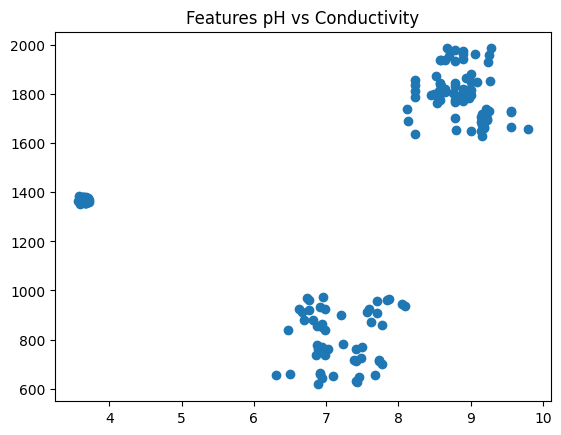

In [ ]:
# plotting
import matplotlib.pyplot as plt
x=data1['pH m']
y=data1['Cm (µS/cm)']
plt.title('Features pH vs Conductivity')
plt.scatter(x,y)
plt.show()

     S.no  pH m   pH CR  Cm (µS/cm)  Conductivity CR  LDR m (kΩ)  cluster
0       1  6.98       0       736.0           0.0000         304        0
1       2  7.39       0       715.0           0.0000         301        0
2       3  6.92       0       665.0           0.0000         302        0
3       4  6.95       0       643.0           0.0000         306        0
4       5  7.42       0       714.0           0.0000         305        0
..    ...   ...     ...         ...              ...         ...      ...
151   152  3.59   0.194      1381.0           0.1905         309        2
152   153  3.61  0.1927      1373.0           0.1865         309        2
153   154  3.58  0.1947      1383.0           0.1915         309        2
154   155  3.56   0.196      1365.0           0.1825         308        2
155   156  3.59   0.194      1354.0           0.1770         309        2

[156 rows x 7 columns]


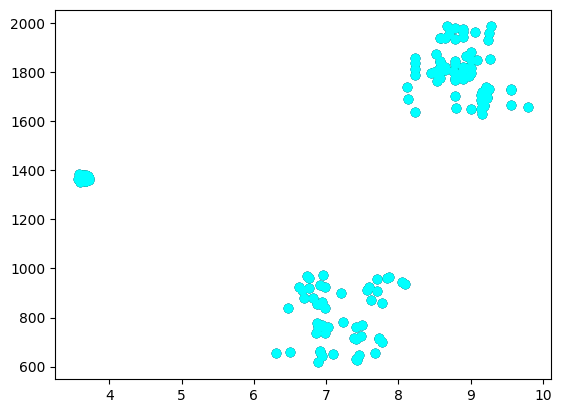

In [ ]:
# gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data1)

#predictions from gmm
labels = gmm.predict(data1)
#print(labels)
frame = pd.DataFrame(data1)
#print(frame)
frame['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']
print(frame)
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data1["pH m"],data1["Cm (µS/cm)"],c=color[k])
plt.show()

In [ ]:
import pickle

# saving the model
filename='final_model.sav'
pickle.dump(gmm,open(filename,'wb'))



In [ ]:
'''
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model('/content/drive/final_model.bin') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)
  '''

"\nimport tensorflow as tf\n\n# Convert the model\nconverter = tf.lite.TFLiteConverter.from_keras_model('/content/drive/final_model.bin') # path to the SavedModel directory\ntflite_model = converter.convert()\n\n# Save the model.\nwith open('model.tflite', 'wb') as f:\n  f.write(tflite_model)\n  "

In [ ]:
!pip install m2cgen


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
'''
import m2cgen as m2c
model_to_python=m2c.export_to_python(gmm)
'''



'\nimport m2cgen as m2c\nmodel_to_python=m2c.export_to_python(gmm)\n'

In [ ]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)

#predictions from kmeans
pred = kmeans.predict(data1)
frame = pd.DataFrame(data1)
frame['cluster'] = pred
frame.columns = ['S.no', 'pH m','pH CR','Cm (µS/cm)','Conductivity CR','LDR m (kΩ)', 'cluster']

#plotting results
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data1["pH m"],data1["Cm (µS/cm)"],c=color[k])
plt.show()
'''

'\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=3)\nkmeans.fit(data1)\n\n#predictions from kmeans\npred = kmeans.predict(data1)\nframe = pd.DataFrame(data1)\nframe[\'cluster\'] = pred\nframe.columns = [\'S.no\', \'pH m\',\'pH CR\',\'Cm (µS/cm)\',\'Conductivity CR\',\'LDR m (kΩ)\', \'cluster\']\n\n#plotting results\ncolor=[\'blue\',\'green\',\'cyan\']\nfor k in range(0,3):\n    data = frame[frame["cluster"]==k]\n    plt.scatter(data1["pH m"],data1["Cm (µS/cm)"],c=color[k])\nplt.show()\n'

In [ ]:
'''
import tensorflow as tf
import numpy as np
tf_model= tf.keras.models.Sequential()
tf_model.add(tf.keras.Input(shape=(2,)))
tf_model.add(tf.keras.layers.Dense(1))

# assign the parameters from sklearn to the TF model\

tf_model.layers[0].weights[0].assign(kmeans.transpose())
tf_model.layers[0].bias.assign(kmeans.intercept_)
'''

'\nimport tensorflow as tf\nimport numpy as np\ntf_model= tf.keras.models.Sequential()\ntf_model.add(tf.keras.Input(shape=(2,)))\ntf_model.add(tf.keras.layers.Dense(1))\n\n# assign the parameters from sklearn to the TF model\ntf_model.layers[0].weights[0].assign(kmeans.transpose())\ntf_model.layers[0].bias.assign(kmeans.intercept_)\n'

[6.98, 7.39, 6.92, 6.95, 7.42, 6.92, 7.43, 6.94, 7.77, 6.5, 7.42, 6.3, 7.67, 7.49, 7.1, 7.42, 7.73, 7.73, 6.86, 6.89, 6.89, 7.45, 6.88, 7.24, 7.48, 7.02, 7.62, 6.96, 6.98, 6.99, 6.76, 6.82, 6.69, 6.63, 6.73, 6.77, 6.92, 7.57, 7.77, 7.7, 6.88, 7.71, 6.95, 7.6, 6.94, 6.47, 8.09, 6.67, 7.2, 8.05, 7.87, 7.84, 9.24, 9.28, 8.5, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 9.27, 9.09, 9.25, 8.59, 8.64, 8.55, 8.58, 8.64, 8.93, 8.78, 8.78, 8.52, 8.67, 8.59, 9.06, 8.7, 8.23, 8.23, 8.45, 8.76, 8.56, 8.56, 8.79, 8.94, 8.87, 8.78, 8.78, 8.56, 8.98, 9.01, 9.01, 8.58, 8.58, 8.23, 8.23, 9.01, 9.01, 8.78, 8.78, 8.65, 8.57, 8.53, 9.14, 9.14, 9.16, 9.16, 9.21, 9.16, 9.2, 9.21, 9.18, 9.18, 9.16, 9.14, 9.21, 9.26, 9.56, 9.8, 9.23, 9.56, 9.56, 9.23, 8.78, 8.12, 8.14, 8.8, 8.23, 9.01, 3.72, 3.72, 3.71, 3.7, 3.68, 3.68, 3.67, 3.68, 3.67, 3.65, 3.67, 3.64, 3.68, 3.65, 3.65, 3.64, 3.62, 3.64, 3.64, 3.64, 3.59, 3.59, 3.61, 3.58, 3.56, 3.59]
[736.0, 715.0, 665.0, 643.0, 714.0, 659.0, 626.0, 769.0, 699.0, 660.0, 761.0, 654.

score: 1416921.4
cluster centers: [[   8.871155  1799.1794   ]
 [   3.6488457 1369.0383   ]
 [   7.191732   806.11536  ]]
point: (6.98, 736.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (7.39, 715.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.92, 665.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.95, 643.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (7.42, 714.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.92, 659.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (7.43, 626.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.94, 769.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (7.77, 699.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.5, 660.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (7.42, 761.0) is in cluster 2 centered at [  7.191732 806.11536 ]
point: (6.3, 654.0) is in cluster 2 centered at [  7.191732 806.11536 ]
poin

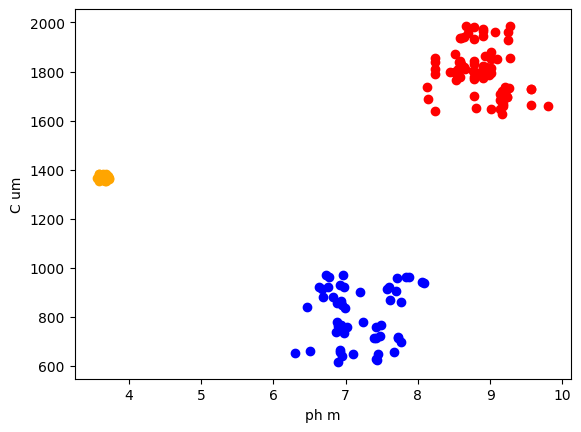

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_points = 155
dimensions = 2
#points = np.random.uniform(0, 1000, [num_points, dimensions])
x1=data1['pH m'].tolist()
print(x1)
y1=data1['Cm (µS/cm)'].tolist()
print(y1)
points=list(zip(x1,y1))
print(points)

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 3
kmeans1 = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for x in range(num_iterations):
  kmeans1.train(input_fn)
  cluster_centers = kmeans1.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans1.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans1.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)  
  x2=point[0]
  #print(x2)
  y2=point[1]
  if(cluster_index==0):
    plt.scatter(x2,y2,color='red')
  if(cluster_index==1):  
    plt.scatter(x2,y2, color='orage')
  if(cluster_index==2):  
    plt.scatter(x2,y2,color='blue') 
  plt.xlabel('ph m')
  plt.ylabel('C um')
plt.show()
  



In [21]:
first_scatter=[]
second_scatter=[]
third_scatter=[]
first_scatter_c=[]
second_scatter_c=[]
third_scatter_c=[]
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  #print('point:', point, 'is in cluster', cluster_index, 'centered at', center)  
  x2=point[0]
  #print(x2)
  y2=point[1]
  if(cluster_index==0):
    #plt.scatter(x2,y2,color='red')
    first_scatter.append(x2)
    first_scatter_c.append(y2)
  if(cluster_index==1):  
    second_scatter.append(x2)
    second_scatter_c.append(y2)
  if(cluster_index==2):  
    third_scatter.append(x2)
    third_scatter_c.append(y2)
  #plt.xlabel('ph m')
  #plt.ylabel('C um')
#plt.show()

print(max(third_scatter))
print(max(third_scatter_c))
print(min(third_scatter))
print(min(third_scatter_c))
  


9.8
1986.0
8.12
1629.0


In [ ]:
#print(cluster_indices)
d=[]
for x in cluster_indices:
  if(x==1):
    d.append('pure')
  if(x==2):  
    d.append('moderate')
  if(x==0):  
    d.append('Harmful')
data1['Final_Classes']=cluster_indices
data1['Labels']=d
print(data1)

     pH m  Cm (µS/cm)  Final_Classes   Labels
0    6.98       736.0              1     pure
1    7.39       715.0              1     pure
2    6.92       665.0              1     pure
3    6.95       643.0              1     pure
4    7.42       714.0              1     pure
..    ...         ...            ...      ...
151  3.59      1381.0              0  Harmful
152  3.61      1373.0              0  Harmful
153  3.58      1383.0              0  Harmful
154  3.56      1365.0              0  Harmful
155  3.59      1354.0              0  Harmful

[156 rows x 4 columns]


In [ ]:
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K

model = Sequential()
#K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(10, activation= 'softmax' ))
# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
'''
#data1.pop('cluster')
#data1.pop('Labels')


"\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Dropout\nfrom keras.layers import Flatten\nfrom keras.layers.convolutional import Convolution2D\nfrom keras.layers.convolutional import MaxPooling2D\nfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder\nfrom keras import backend as K\n\nmodel = Sequential()\n#K.set_image_dim_ordering('th')\nmodel.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Convolution2D(15, 3, 3, activation= 'relu' ))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation= 'relu' ))\nmodel.add(Dense(50, activation= 'relu' ))\nmodel.add(Dense(10, activation= 'softmax' ))\n# Compile model\nmodel.compile(loss= 'categorical_crossentropy' , 

In [ ]:
print(data1)

     pH m  Cm (µS/cm)  Final_Classes   Labels
0    6.98       736.0              1     pure
1    7.39       715.0              1     pure
2    6.92       665.0              1     pure
3    6.95       643.0              1     pure
4    7.42       714.0              1     pure
..    ...         ...            ...      ...
151  3.59      1381.0              0  Harmful
152  3.61      1373.0              0  Harmful
153  3.58      1383.0              0  Harmful
154  3.56      1365.0              0  Harmful
155  3.59      1354.0              0  Harmful

[156 rows x 4 columns]


In [ ]:
data1.pop('S.no')

KeyError: ignored

In [ ]:
data1.pop('pH CR')
data1.pop('Conductivity CR')
data1.pop('LDR m (kΩ)')



KeyError: ignored

In [ ]:
#data1.pop('cluster')
data1.pop('Final_Classes')
data1


,pH m,Cm (µS/cm),Labels
0,6.98,736.0,pure
1,7.39,715.0,pure
2,6.92,665.0,pure
3,6.95,643.0,pure
4,7.42,714.0,pure
...,...,...,...
151,3.59,1381.0,Harmful
152,3.61,1373.0,Harmful
153,3.58,1383.0,Harmful
154,3.56,1365.0,Harmful


In [ ]:
from sklearn.model_selection import train_test_split
data1_features = data1.copy()
data1_labels = data1_features.pop('Labels')
data1_features = np.array(data1_features)
data1_features

X_train, X_test,y_train, y_test = train_test_split(data1_features, data1_labels ,
                                   test_size=0.30, 
                                   shuffle=True)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)
print()

[[   3.64 1361.  ]
 [   3.68 1355.  ]
 [   8.23 1839.  ]
 [   7.62  871.  ]
 [   7.02  761.  ]
 [   7.42  714.  ]
 [   8.79 1797.  ]
 [   8.9  1964.  ]
 [   8.5  1799.  ]
 [   8.55 1787.  ]
 [   8.76 1803.  ]
 [   7.73  717.  ]
 [   3.65 1366.  ]
 [   6.76  921.  ]
 [   6.82  881.  ]
 [   6.5   660.  ]
 [   3.67 1372.  ]
 [   6.77  962.  ]
 [   8.78 1934.  ]
 [   8.56 1807.  ]
 [   6.98  736.  ]
 [   6.98  924.  ]
 [   9.06 1962.  ]
 [   8.23 1856.  ]
 [   9.23 1695.  ]
 [   7.6   924.  ]
 [   8.9  1822.  ]
 [   8.78 1832.  ]
 [   3.58 1383.  ]
 [   9.24 1929.  ]
 [   8.9  1944.  ]
 [   8.7  1956.  ]
 [   7.39  715.  ]
 [   8.78 1777.  ]
 [   3.59 1354.  ]
 [   9.14 1708.  ]
 [   6.86  737.  ]
 [   9.21 1738.  ]
 [   6.92  665.  ]
 [   6.92  932.  ]
 [   9.16 1629.  ]
 [   8.23 1789.  ]
 [   8.12 1739.  ]
 [   7.43  626.  ]
 [   7.77  699.  ]
 [   9.21 1712.  ]
 [   7.77  860.  ]
 [   7.67  656.  ]
 [   8.14 1690.  ]
 [   8.98 1785.  ]
 [   8.52 1873.  ]
 [   9.01 1795.  ]
 [   3.71 13

In [ ]:
# using KNN for classification

# importing necessary libraries
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

######################Classification###########################
KNN = KNeighborsClassifier(20)
KNN.fit(X_train,y_train)

'''
The following output will create the K nearest neighbor classifier constructor −

KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
   metric_params = None, n_jobs = 1, n_neighbors = 20, p = 2,
   weights = 'uniform')
'''   

"\nThe following output will create the K nearest neighbor classifier constructor −\n\nKNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',\n   metric_params = None, n_jobs = 1, n_neighbors = 20, p = 2,\n   weights = 'uniform')\n"

In [ ]:
###############################PREDICTION ON TEST DATASET###########################
pred1=KNN.predict(X_test)
print(pred1)
print(type(X_test))

['pure' 'moderate' 'moderate' 'Harmful' 'pure' 'moderate' 'pure'
 'moderate' 'moderate' 'moderate' 'pure' 'pure' 'moderate' 'pure'
 'moderate' 'moderate' 'moderate' 'moderate' 'moderate' 'pure' 'pure'
 'Harmful' 'moderate' 'moderate' 'moderate' 'moderate' 'Harmful'
 'moderate' 'Harmful' 'moderate' 'moderate' 'pure' 'pure' 'moderate'
 'Harmful' 'Harmful' 'moderate' 'Harmful' 'Harmful' 'Harmful' 'pure'
 'moderate' 'pure' 'moderate' 'pure' 'moderate' 'moderate']
<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,pred1)
print(acc1)

1.0


In [ ]:
################PREDICTING UNKNOWN VALUE####################################
import array as arr
ph_value=float(input('ENTER PH VALUE  '))
conductivity= float(input('ENTER CONDUCTIVITY VALUE  '))
ap=np.array([[ph_value,conductivity]])
#ap1=ap.reshape(-1,1)
pred_final= KNN.predict(ap)

print(pred_final[0])
#.print(type(pred_final[0]))


ENTER PH VALUE  7.0
ENTER CONDUCTIVITY VALUE  800.0
pure


In [ ]:
#####################TRYING SUPPORT VECTOR MACHINE################33
import pandas as pd
import numpy as np #import numpy library, used for arithmetic
from sklearn.model_selection import train_test_split #mpodule that allow us to split our train and test sets
from sklearn.svm import SVC #the machine learning classifier model
model = SVC(gamma=0.001) #lets instanciate our model

In [ ]:
model.fit(X_train, y_train) #we train our model

SVC(gamma=0.001)

In [ ]:
####model evaluation#######
print("Accuracy for the model : {} %".format(100*round(model.score(X_test,y_test),2))) #we verify the accuracy of our model

Accuracy for the model : 100.0 %


In [ ]:
#######################CONVERTING TO C CODE############################
!pip install micromlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from micromlgen import port
LABELS = ['PURE','MODERATE','HARMFUL'] #our existing labels
classMap = {} #create an empty dict
for i, label in zip(range(3),LABELS): #interate over the range and the labels at the same time 
  classMap[i]=label #fill our dict

print(classMap)

{0: 'PURE', 1: 'MODERATE', 2: 'HARMFUL'}


In [ ]:
####CONVERT THE MODEL###########
c_code = port(model) #convert our model

#Let's write it into a .h file
modelFile = open("model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 8,311 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


WE ARE USING MODEL.H FILE FOR NOW


In [ ]:
####################decline this as of now#####################################

In [ ]:
# importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
# model
data1_model = tf.keras.Sequential([
  layers.Dense(32),  
  layers.Dense(64),
  layers.Dense(128),
  layers.Dense(64),
  layers.Dense(32),
  layers.Dense(1)
])

data1_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
data1_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 5ms/step - loss: 1651.0865
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 346.9041
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 635.4667
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 351.8263
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 139.6939
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 220.8984
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 40.7481
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 58.9790
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 51.3357
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 8.9279


In [ ]:
data1_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                96        
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,897
Trainable params: 20,897
Non-trai

In [ ]:
data1_model.save('finalised_model')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pred = data1_model.predict(X_test)
print(pred)
#print(pred)
ma=max(pred)
mi=min(pred)
d_fin=[]
for x in pred:
  x1=(x-mi)/(ma-mi)
  x2=x1*2
  x3=x2.round()
  d_fin.append(int(x3))
print(d_fin)



2/2 [==============================] - 0s 6ms/step
[[ 7.2363486]
 [ 7.143972 ]
 [ 2.909349 ]
 [ 4.1244407]
 [ 9.904614 ]
 [ 4.2883353]
 [ 9.280454 ]
 [ 9.883908 ]
 [ 8.463635 ]
 [ 4.211927 ]
 [ 7.2888083]
 [ 8.38313  ]
 [ 9.668485 ]
 [ 7.299726 ]
 [ 8.519666 ]
 [ 7.2600303]
 [ 9.24693  ]
 [ 2.768556 ]
 [10.013883 ]
 [ 9.423093 ]
 [ 9.343793 ]
 [ 9.252225 ]
 [ 9.259213 ]
 [ 9.069211 ]
 [ 3.3175788]
 [ 3.2974906]
 [ 2.7831779]
 [ 9.07121  ]
 [ 7.171018 ]
 [ 9.793073 ]
 [ 9.873792 ]
 [ 4.344587 ]
 [ 7.2327704]
 [ 7.211576 ]
 [ 7.238607 ]
 [ 9.013165 ]
 [ 8.470258 ]
 [ 3.3835654]
 [ 9.099042 ]
 [ 9.0771   ]
 [ 3.1010337]
 [10.054532 ]
 [ 9.2506075]
 [ 9.798123 ]
 [ 9.443448 ]
 [ 8.454129 ]
 [ 4.269613 ]]
[1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0]


In [ ]:
#loss, accuracy = data1_model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 7ms/step - loss: 1.6812e-07


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


TypeError: ignored

In [ ]:
from sklearn import accuracy_score
print(accuracy_score(d_fin,y_test))

ImportError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,d_fin)
print(acc)


0.5531914893617021


In [ ]:
import os
os.chdir("/content/finalised_model.h5")

NotADirectoryError: ignored

In [ ]:
# converting to tflite format
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/finalised_model') # path to the SavedModel directory
tflite_model = converter.convert()


In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!xxd -i model.tflite > model_data.cc
